In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./datasets/advertising.csv',
                   names=['TimeSpent', 'Age', 'AreaIncome', 
                          'DailyInternetUsage', 'AdHeadline', 
                          'City', 'Male', 'Country', 'Timestamp', 
                          'Clicked'],
                   header=1)

In [5]:
data.head(10)

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
0,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
1,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,?,1,Italy,2016-01-10 02:31:19,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.0,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           1010 non-null   object 
 1   Age                 1010 non-null   object 
 2   AreaIncome          1010 non-null   float64
 3   DailyInternetUsage  1010 non-null   float64
 4   AdHeadline          1010 non-null   object 
 5   City                1010 non-null   object 
 6   Male                1010 non-null   int64  
 7   Country             1010 non-null   object 
 8   Timestamp           1010 non-null   object 
 9   Clicked             1010 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 79.0+ KB


In [7]:
data[data.duplicated() == True]

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
23,77.22,30,64802.33,224.44,Object-based reciprocal knowledgebase,Port Jacqueline,1,Cameroon,2016-01-05 07:52:48,0
35,67.64,35,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,2016-07-02 20:23:15,0
238,40.42,45,40183.75,133.90,Stand-alone reciprocal synergy,Lisamouth,1,Norway,2016-03-16 07:59:37,1
496,50.19,40,33987.27,117.30,Progressive uniform budgetary management,Lake Stephenborough,0,Thailand,2016-03-25 19:02:35,1


In [9]:
data.drop_duplicates(inplace=True)
data[data.duplicated() == True]

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked


In [10]:
data[data['TimeSpent'] == '?']

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
908,?,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,2016-06-26 02:34:15,1


In [11]:
data.loc[908]

TimeSpent                                                         ?
Age                                                              43
AreaIncome                                                  53647.8
DailyInternetUsage                                           121.28
AdHeadline            Monitored homogeneous artificial intelligence
City                                                     Robertfurt
Male                                                              0
Country                                                       Macao
Timestamp                                       2016-06-26 02:34:15
Clicked                                                           1
Name: 908, dtype: object

In [12]:
data.replace('?', np.nan, inplace=True)

In [13]:
data['TimeSpent'] = pd.to_numeric(data['TimeSpent'])
data['Age'] = pd.to_numeric(data['Age'])

In [14]:
data.isnull().sum()


TimeSpent             1
Age                   2
AreaIncome            0
DailyInternetUsage    0
AdHeadline            2
City                  2
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
data.isnull().sum()


TimeSpent             1
Age                   0
AreaIncome            0
DailyInternetUsage    0
AdHeadline            2
City                  2
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

In [ ]:
data.to_csv('./datasets/advertising_cleaned.csv', index=False)

In [17]:
numeric = ['TimeSpent',
           'Age', 'AreaIncome',
           'DailyInternetUsage' ]

In [18]:
data[numeric].describe()


,TimeSpent,Age,AreaIncome,DailyInternetUsage
count,1005.000000,1006.000000,1006.000000,1006.000000
mean,64.988229,36.026839,55011.547117,179.694433
std,15.843371,8.774130,13397.474799,43.939255
min,32.600000,19.000000,13996.500000,104.780000
25%,51.300000,29.000000,47073.067500,138.527500
50%,68.110000,35.000000,56998.245000,182.425000
75%,78.540000,42.000000,65488.065000,218.580000
max,91.430000,61.000000,79484.800000,269.960000


In [19]:
import matplotlib.pyplot as plt


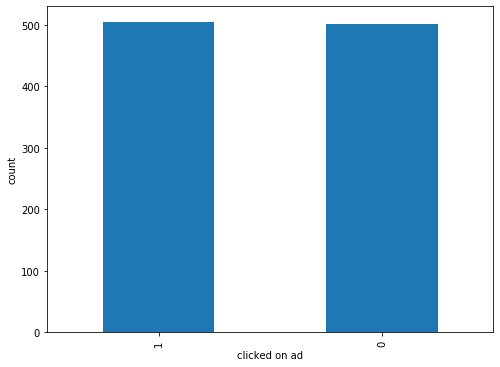

In [20]:
data['Clicked'].value_counts().plot(kind = 'bar', figsize=(8,6))

plt.xlabel('clicked on ad')
plt.ylabel('count')


plt.show()

In [21]:
monthly_data = data.groupby(['Month'])['Clicked'].sum()

monthly_data.plot(figsize=(10, 6))

KeyError: 'Month'